In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

C:\Users\asus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_price = pd.read_excel("data/Day-ahead_prices.xlsx")
df_price = df_price.drop(index=range(0, 8))
df_price = df_price.reset_index(drop=True)
new_header = df_price.iloc[0]
df_price = df_price[1:]
df_price.columns = new_header 
df_price.tail()

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Start date,End date,Germany/Luxembourg [€/MWh],∅ DE/LU neighbours [€/MWh],Belgium [€/MWh],Denmark 1 [€/MWh],Denmark 2 [€/MWh],France [€/MWh],Netherlands [€/MWh],Norway 2 [€/MWh],Austria [€/MWh],Poland [€/MWh],Sweden 4 [€/MWh],Switzerland [€/MWh],Czech Republic [€/MWh],DE/AT/LU [€/MWh],Northern Italy [€/MWh],Slovenia [€/MWh],Hungary [€/MWh]
44996,"Feb 17, 2025 7:00 PM","Feb 17, 2025 8:00 PM",215.36,207.55,215.46,215.36,215.4,215.52,215.43,136.41,216.13,218.2,215.27,203.38,216.5,-,215.52,216.46,216.88
44997,"Feb 17, 2025 8:00 PM","Feb 17, 2025 9:00 PM",177.86,173.17,177.95,177.86,177.88,178,177.93,125.63,178.69,180.9,179.55,171.35,179.08,-,178,179.03,179.49
44998,"Feb 17, 2025 9:00 PM","Feb 17, 2025 10:00 PM",155.19,152.2,155.38,155.19,155.2,155.62,155.3,116.26,159.84,154.09,155.93,159.98,151.4,-,160,161.59,166.68
44999,"Feb 17, 2025 10:00 PM","Feb 17, 2025 11:00 PM",139.39,137.86,139.51,139.39,139.4,140,139.39,107.73,150.02,137.24,136.05,156.48,131.21,-,153.72,153.72,164.94
45000,"Feb 17, 2025 11:00 PM","Feb 18, 2025 12:00 AM",129.57,129.34,130,129.57,129.56,130.6,129.72,111.25,134.93,127.68,126.77,149.67,122.95,-,147.26,140.81,149.69


In [3]:
df_consum = pd.read_excel("data/Actual_consumption.xlsx")
df_consum = df_consum.drop(index=range(0, 8))
df_consum = df_consum.reset_index(drop=True)
new_header = df_consum.iloc[0]
df_consum = df_consum[1:]
df_consum.columns = new_header
df_consum.head()

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Start date,End date,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
1,"Jan 1, 2020 12:00 AM","Jan 1, 2020 1:00 AM",43968.5,44244.25,275.75,37334.25
2,"Jan 1, 2020 1:00 AM","Jan 1, 2020 2:00 AM",43047,43528.75,481.75,35991
3,"Jan 1, 2020 2:00 AM","Jan 1, 2020 3:00 AM",41895,42576.5,681.5,34458
4,"Jan 1, 2020 3:00 AM","Jan 1, 2020 4:00 AM",40701.75,41453,751.25,33152
5,"Jan 1, 2020 4:00 AM","Jan 1, 2020 5:00 AM",40681.25,42153.25,1472,32930.75


In [4]:
df_consum.drop(columns={'Hydro pumped storage [MWh]'},inplace=True)

In [5]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
    
columns_to_convert = ['grid load [MWh]', 'Residual load [MWh]']
for col in columns_to_convert:
    df_consum[col] = df_consum[col].apply(convert_to_float)

In [6]:
df_generate = pd.read_excel("data/Actual_generation.xlsx")
df_generate = df_generate.drop(index=range(0, 8))
df_generate = df_generate.reset_index(drop=True)
new_header = df_generate.iloc[0]
df_generate = df_generate[1:]
df_generate.columns = new_header

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
columns_to_convert = ['Biomass [MWh]','Hydropower [MWh]','Wind offshore [MWh]','Wind onshore [MWh]','Photovoltaics [MWh]','Other renewable [MWh]','Nuclear [MWh]','Lignite [MWh]','Hard coal [MWh]','Fossil gas [MWh]','Hydro pumped storage [MWh]','Other conventional [MWh]']
for col in columns_to_convert:
    df_generate[col] = df_generate[col].apply(convert_to_float)

In [8]:
new_cols = ['Biomass [MWh]','Hydropower [MWh]','Other renewable [MWh]','Nuclear [MWh]','Lignite [MWh]','Hard coal [MWh]','Fossil gas [MWh]','Hydro pumped storage [MWh]','Other conventional [MWh]']
df_generate['Other Generation'] = df_generate.drop(columns=['Start date', 'End date'])[new_cols].sum(axis=1)

In [9]:
df_generation = df_generate[['Start date', 'End date', 'Other Generation', 'Wind offshore [MWh]','Wind onshore [MWh]','Photovoltaics [MWh]']]

In [10]:
df_merge = pd.merge(df_consum,df_price[['Start date','Germany/Luxembourg [€/MWh]']],on = 'Start date')
df = pd.merge(df_generation,df_merge[['Start date','Germany/Luxembourg [€/MWh]','grid load [MWh]','Residual load [MWh]']],on = 'Start date')
df = df.rename(columns={'grid load [MWh]': 'Total Grid','Germany/Luxembourg [€/MWh]':'Germany Prices','Residual load [MWh]':'Residual Load','Wind offshore [MWh]':'Wind offshore','Wind onshore [MWh]':'Wind onshore','Photovoltaics [MWh]':'Photovoltaics'})
df['Start date'] = pd.to_datetime(df['Start date'])
df["Year"] = pd.to_datetime(df["Start date"]).dt.year
df['Date'] = pd.to_datetime(df['Start date'], format='%Y-%m-%d',errors='coerce').dt.date
df['Time'] = pd.to_datetime(df['Start date'],format='%H:%M:%S').dt.time
df["Month"] = pd.to_datetime(df["Start date"]).dt.month
df["Day"] = pd.to_datetime(df["Start date"]).dt.day_name()
war_start_date = pd.Timestamp("2022-02-24")
df["War Indicator"] = (df["Start date"] >= war_start_date).astype(int)
df.drop(columns={'End date'},inplace=True)
df.set_index('Start date',inplace=True)
df.index = pd.to_datetime(df.index, errors='coerce')
df['Germany Prices'] = pd.to_numeric(df['Germany Prices'], errors='coerce')
df.head(5)

C:\Users\asus\AppData\Local\Temp\ipykernel_9732\1819096435.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start date'] = pd.to_datetime(df['Start date'])


,Other Generation,Wind offshore,Wind onshore,Photovoltaics,Germany Prices,Total Grid,Residual Load,Year,Date,Time,Month,Day,War Indicator
Start date,,,,,,,,,,,,,
2020-01-01 00:00:00,34496.75,549.25,6085.00,0.0,41.88,43968.50,37334.25,2020,2020-01-01,00:00:00,1,Wednesday,0
2020-01-01 01:00:00,33937.75,1169.25,5886.75,0.0,38.60,43047.00,35991.00,2020,2020-01-01,01:00:00,1,Wednesday,0
2020-01-01 02:00:00,35350.00,1665.50,5771.50,0.0,36.55,41895.00,34458.00,2020,2020-01-01,02:00:00,1,Wednesday,0
2020-01-01 03:00:00,35671.50,2062.25,5487.50,0.0,32.32,40701.75,33152.00,2020,2020-01-01,03:00:00,1,Wednesday,0
2020-01-01 04:00:00,35358.00,2292.00,5458.50,0.0,30.85,40681.25,32930.75,2020,2020-01-01,04:00:00,1,Wednesday,0


In [11]:
duplicates = df.index.duplicated()
print(df.index[duplicates])
df = df[~df.index.duplicated(keep='first')]

DatetimeIndex(['2020-10-25 02:00:00', '2020-10-25 02:00:00',
               '2020-10-25 02:00:00', '2020-10-25 02:00:00',
               '2020-10-25 02:00:00', '2020-10-25 02:00:00',
               '2020-10-25 02:00:00', '2021-10-31 02:00:00',
               '2021-10-31 02:00:00', '2021-10-31 02:00:00',
               '2021-10-31 02:00:00', '2021-10-31 02:00:00',
               '2021-10-31 02:00:00', '2021-10-31 02:00:00',
               '2022-10-30 02:00:00', '2022-10-30 02:00:00',
               '2022-10-30 02:00:00', '2022-10-30 02:00:00',
               '2022-10-30 02:00:00', '2022-10-30 02:00:00',
               '2022-10-30 02:00:00', '2023-10-29 02:00:00',
               '2023-10-29 02:00:00', '2023-10-29 02:00:00',
               '2023-10-29 02:00:00', '2023-10-29 02:00:00',
               '2023-10-29 02:00:00', '2023-10-29 02:00:00',
               '2024-10-27 02:00:00', '2024-10-27 02:00:00',
               '2024-10-27 02:00:00', '2024-10-27 02:00:00',
               '2024-10-

In [12]:
df.isna().sum()

0
Other Generation    0
Wind offshore       0
Wind onshore        0
Photovoltaics       0
Germany Prices      0
Total Grid          0
Residual Load       0
Year                0
Date                0
Time                0
Month               0
Day                 0
War Indicator       0
dtype: int64

In [13]:
columns_na = ['Total Grid', 'Residual Load', 'Other Generation','Wind onshore','Wind offshore','Photovoltaics','Germany Prices']
df[columns_na] = df[columns_na].apply(lambda col: col.fillna(col.mean()))

Text(0.5, 1.0, 'Photovoltaics')

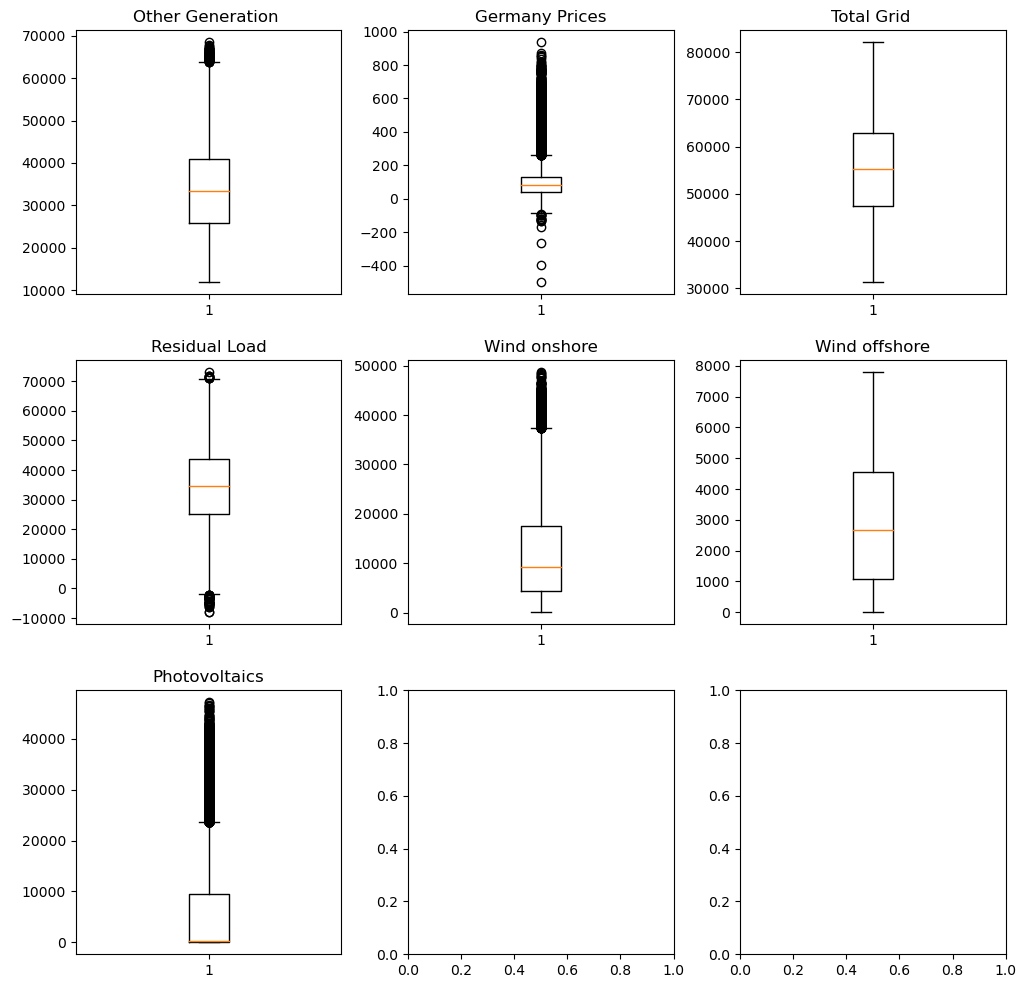

In [14]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(df['Other Generation'])
ax[0][0].set_title('Other Generation ')

ax[0][1].boxplot(df['Germany Prices'])
ax[0][1].set_title('Germany Prices')

ax[0][2].boxplot(df['Total Grid'])
ax[0][2].set_title('Total Grid ')

ax[1][0].boxplot(df['Residual Load'])
ax[1][0].set_title('Residual Load')

ax[1][1].boxplot(df['Wind onshore'])
ax[1][1].set_title('Wind onshore')

ax[1][2].boxplot(df['Wind offshore'])
ax[1][2].set_title('Wind offshore')

ax[2][0].boxplot(df['Photovoltaics'])
ax[2][0].set_title('Photovoltaics')

In [15]:
df.drop(columns=['Day','Date','Month','Time','Year'],inplace = True)

In [16]:
for i in df.columns:    
    dt = df[i].astype(float).to_numpy()
    Q1=np.percentile(dt,25)
    Q3=np.percentile(dt,75)
    IQ=Q3-Q1
    upper=Q3+1.5*IQ
    lower=Q1-1.5*IQ

    dt[(dt[:]>upper) | (dt[:]<lower)]=np.nan
    df[i]=dt


In [17]:
df.isnull().sum()

0
Other Generation      81
Wind offshore          0
Wind onshore         906
Photovoltaics       3706
Germany Prices      3465
Total Grid             0
Residual Load         57
War Indicator          0
dtype: int64

In [18]:
# Filling the outliers using interpolation method
df=df.interpolate(method='linear', axis=0)
df.isna().sum()

0
Other Generation    0
Wind offshore       0
Wind onshore        0
Photovoltaics       0
Germany Prices      0
Total Grid          0
Residual Load       0
War Indicator       0
dtype: int64

Text(0.5, 1.0, 'Photovoltaics')

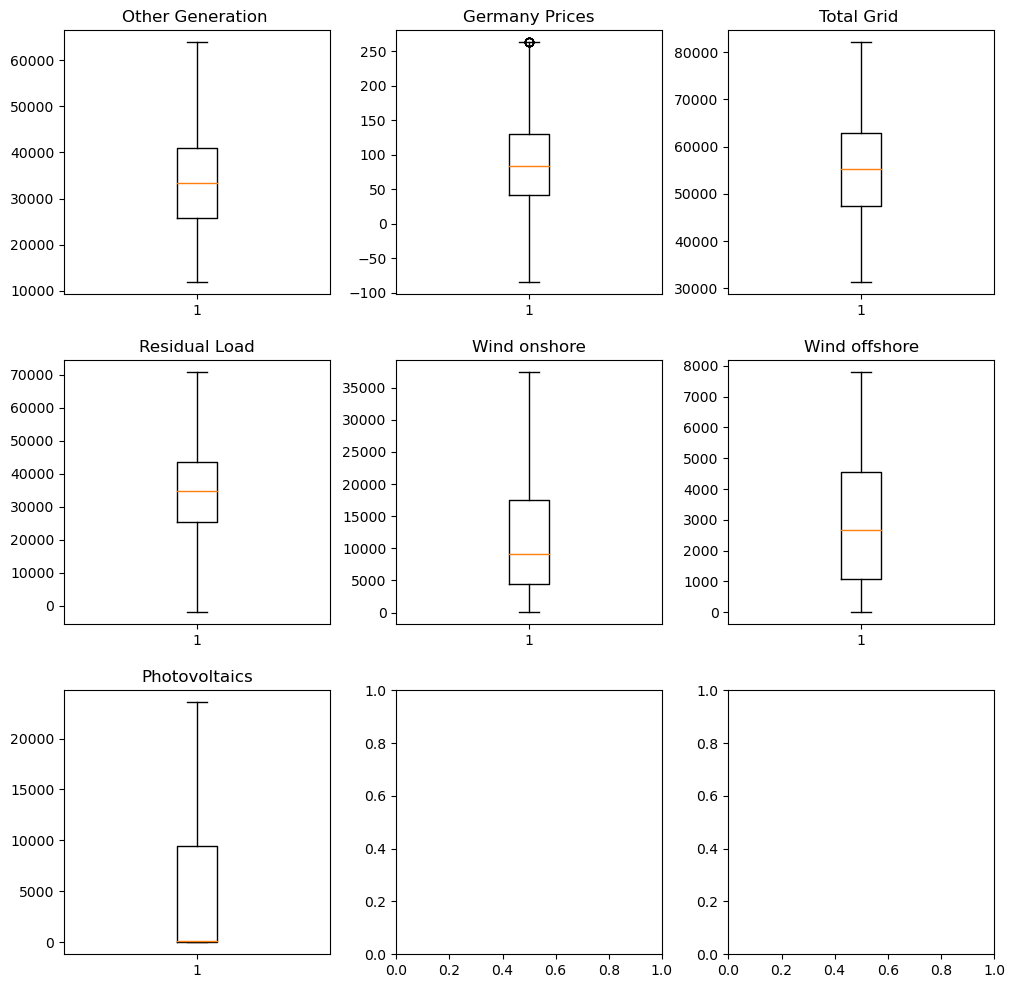

In [19]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(df['Other Generation'])
ax[0][0].set_title('Other Generation ')

ax[0][1].boxplot(df['Germany Prices'])
ax[0][1].set_title('Germany Prices')

ax[0][2].boxplot(df['Total Grid'])
ax[0][2].set_title('Total Grid ')

ax[1][0].boxplot(df['Residual Load'])
ax[1][0].set_title('Residual Load')

ax[1][1].boxplot(df['Wind onshore'])
ax[1][1].set_title('Wind onshore')

ax[1][2].boxplot(df['Wind offshore'])
ax[1][2].set_title('Wind offshore')

ax[2][0].boxplot(df['Photovoltaics'])
ax[2][0].set_title('Photovoltaics')

In [20]:
df.head()

,Other Generation,Wind offshore,Wind onshore,Photovoltaics,Germany Prices,Total Grid,Residual Load,War Indicator
Start date,,,,,,,,
2020-01-01 00:00:00,34496.75,549.25,6085.00,0.0,41.88,43968.50,37334.25,0.0
2020-01-01 01:00:00,33937.75,1169.25,5886.75,0.0,38.60,43047.00,35991.00,0.0
2020-01-01 02:00:00,35350.00,1665.50,5771.50,0.0,36.55,41895.00,34458.00,0.0
2020-01-01 03:00:00,35671.50,2062.25,5487.50,0.0,32.32,40701.75,33152.00,0.0
2020-01-01 04:00:00,35358.00,2292.00,5458.50,0.0,30.85,40681.25,32930.75,0.0


In [21]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

In [22]:
features = df.drop(columns=['Germany Prices'])
target = df[['Germany Prices']]
features

,Other Generation,Wind offshore,Wind onshore,Photovoltaics,Total Grid,Residual Load,War Indicator
Start date,,,,,,,
2020-01-01 00:00:00,34496.75,549.25,6085.00,0.0,43968.50,37334.25,0.0
2020-01-01 01:00:00,33937.75,1169.25,5886.75,0.0,43047.00,35991.00,0.0
2020-01-01 02:00:00,35350.00,1665.50,5771.50,0.0,41895.00,34458.00,0.0
2020-01-01 03:00:00,35671.50,2062.25,5487.50,0.0,40701.75,33152.00,0.0
2020-01-01 04:00:00,35358.00,2292.00,5458.50,0.0,40681.25,32930.75,0.0
...,...,...,...,...,...,...,...
2025-02-17 19:00:00,52226.75,1124.00,5165.25,4.0,69697.25,63404.00,1.0
2025-02-17 20:00:00,49565.00,1018.00,5401.50,0.0,66565.50,60146.00,1.0
2025-02-17 21:00:00,46741.50,966.25,5284.75,0.0,63781.25,57530.25,1.0


In [23]:
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [24]:
features_normalised = scaler_features.fit_transform(features)
target_normalised = scaler_target.fit_transform(target)
target_normalised

array([[0.36465993],
       [0.35523897],
       [0.34935087],
       ...,
       [0.69011374],
       [0.64473231],
       [0.61652688]])

In [25]:
dt_arr_normalised = np.hstack((features_normalised, target_normalised))
dt_arr_normalised

array([[0.43502866, 0.07053196, 0.16175958, ..., 0.54072799, 0.        ,
        0.36465993],
       [0.42427783, 0.15014928, 0.15644842, ..., 0.52227054, 0.        ,
        0.35523897],
       [0.45143857, 0.21387524, 0.15336084, ..., 0.50120576, 0.        ,
        0.34935087],
       ...,
       [0.67052273, 0.12408103, 0.14032068, ..., 0.81823897, 1.        ,
        0.69011374],
       [0.63490942, 0.11971492, 0.13175449, ..., 0.7881739 , 1.        ,
        0.64473231],
       [0.59905089, 0.13477158, 0.12511051, ..., 0.75183613, 1.        ,
        0.61652688]])

In [26]:
def create_dataset(df,time_window):
    X,Y=[],[]
    for i in range(time_window, len(df)):
            X.append(df[i - time_window:i, 0:df.shape[1]])
            Y.append(df[i,-1])
    return np.array(X),np.array(Y)
    

In [27]:
train_size = int(0.75 * len(df))
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11249 entries, 2023-11-07 06:00:00 to 2025-02-17 23:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Other Generation  11249 non-null  float64
 1   Wind offshore     11249 non-null  float64
 2   Wind onshore      11249 non-null  float64
 3   Photovoltaics     11249 non-null  float64
 4   Germany Prices    11249 non-null  float64
 5   Total Grid        11249 non-null  float64
 6   Residual Load     11249 non-null  float64
 7   War Indicator     11249 non-null  float64
dtypes: float64(8)
memory usage: 790.9 KB


In [28]:
# Splitting the data into train and test
dt_train, dt_test= dt_arr_normalised[0:round(0.75*len(dt_arr_normalised))] ,  dt_arr_normalised[round(0.75*len(dt_arr_normalised)):]   
dt_train.shape,dt_test.shape

((33746, 8), (11249, 8))

In [29]:
time_window = 24
target_index = -1

In [30]:
X_train,Y_train=create_dataset(dt_train, time_window)
X_test, Y_test=create_dataset(dt_test,time_window)

In [31]:
X_train.shape,Y_train.shape,Y_train.shape,Y_test.shape

((33722, 24, 8), (33722,), (33722,), (11225,))

In [32]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\asus\anaconda3\python.exe -m pip install --upgrade pip


In [33]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten

C:\Users\asus\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [34]:
# inputs for DL models
epoch = 20
batch_size = 24
steps_per_epoch = len(X_train) // batch_size
cyclic_lr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=1e-04,
                                                maximal_learning_rate=1e-02,
                                                scale_fn=lambda x: 1/(2**(x-1)),
                                                step_size=6 * steps_per_epoch)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)
optimizer = Adam(learning_rate=cyclic_lr, amsgrad=True)

In [35]:
def base_model_cnn_lstm():
    
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[-2:]))
    model.add(LSTM(units = 8, return_sequences = True, activation="relu"))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))
    
    return model
cnn_lstm_model = base_model_cnn_lstm()
cnn_lstm_model.compile(optimizer = 'Adam' , loss = 'mean_absolute_error')
cnn_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 64)            1600      
                                                                 
 lstm (LSTM)                 (None, 22, 8)             2336      
                                                                 
 flatten (Flatten)           (None, 176)               0         
                                                                 
 dense (Dense)               (None, 256)               45312     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49505 (193.38 KB)
Trainable params: 49505 (193.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history = cnn_lstm_model.fit(X_train, Y_train, validation_split = 0.2, epochs = 30, 
                   batch_size = batch_size, callbacks=[callback])

Epoch 1/30
1125/1125 [==============================] - 11s 8ms/step - loss: 0.0506 - val_loss: 0.0638
Epoch 2/30
1125/1125 [==============================] - 11s 9ms/step - loss: 0.0305 - val_loss: 0.0309
Epoch 3/30
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0246 - val_loss: 0.0287
Epoch 4/30
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0217 - val_loss: 0.0235
Epoch 5/30
1125/1125 [==============================] - 11s 10ms/step - loss: 0.0208 - val_loss: 0.0238
Epoch 6/30
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0206 - val_loss: 0.0250
Epoch 7/30
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0200 - val_loss: 0.0270
Epoch 8/30
1125/1125 [==============================] - 11s 10ms/step - loss: 0.0191 - val_loss: 0.0341
Epoch 9/30
1125/1125 [==============================] - 10s 9ms/step - loss: 0.0191 - val_loss: 0.0301
Epoch 10/30
1125/1125 [==============================] - 10s 9ms/step -

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [49]:
Y_train_pred = cnn_lstm_model.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)

1054/1054 [==============================] - 4s 3ms/step


In [50]:
Y_pred=cnn_lstm_model.predict(X_test)

351/351 [==============================] - 1s 3ms/step


In [51]:
print ('R-Squared:',r2_score(Y_test,Y_pred))
print ('Mean squared error:', mean_squared_error (Y_pred, Y_test))
print('Mean absolute error',mean_absolute_error(Y_pred,Y_test))
print('Mean absolute percentage error',mean_absolute_percentage_error(Y_pred,Y_test))

R-Squared: 0.9261562580922955
Mean squared error: 0.0012801988499423242
Mean absolute error 0.025136396883577918
Mean absolute percentage error 0.05808075079161482


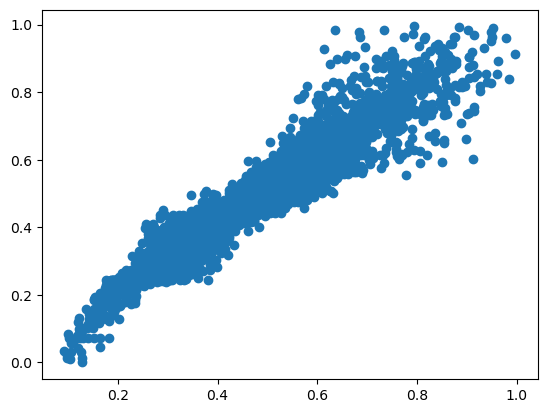

In [52]:
plt.scatter(Y_pred, Y_test)

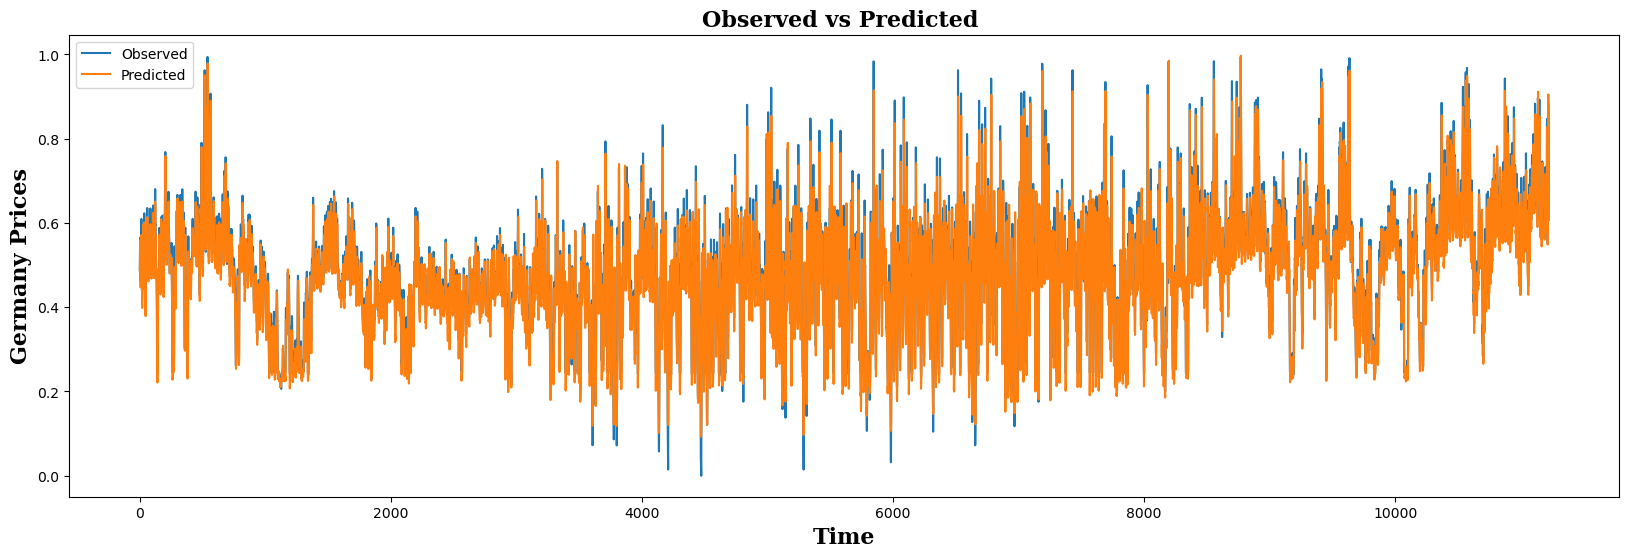

In [53]:
plt.figure(figsize=(20,6))

plt.plot(Y_test)
plt.plot(Y_pred)

plt.xlabel('Time',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Germany Prices',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('Observed vs Predicted ',fontsize=16, fontweight='bold',fontfamily='serif')
plt.legend(['Observed','Predicted'])

In [54]:
Y_pred_inverse = scaler_target.inverse_transform(Y_pred)
Y_test_inverse = scaler_target.inverse_transform(Y_test.reshape(-1, 1))

In [55]:
df_test.info()
Y_test_inverse.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11225 entries, 2023-11-08 06:00:00 to 2025-02-17 23:00:00
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Other Generation  11225 non-null  float64
 1   Wind offshore     11225 non-null  float64
 2   Wind onshore      11225 non-null  float64
 3   Photovoltaics     11225 non-null  float64
 4   Germany Prices    11225 non-null  float64
 5   Total Grid        11225 non-null  float64
 6   Residual Load     11225 non-null  float64
 7   War Indicator     11225 non-null  float64
 8   Y_test_inverse    11225 non-null  float64
 9   Y_pred_inverse    11225 non-null  float32
dtypes: float32(1), float64(9)
memory usage: 920.8 KB


(11225, 1)

<Axes: xlabel='Start date'>

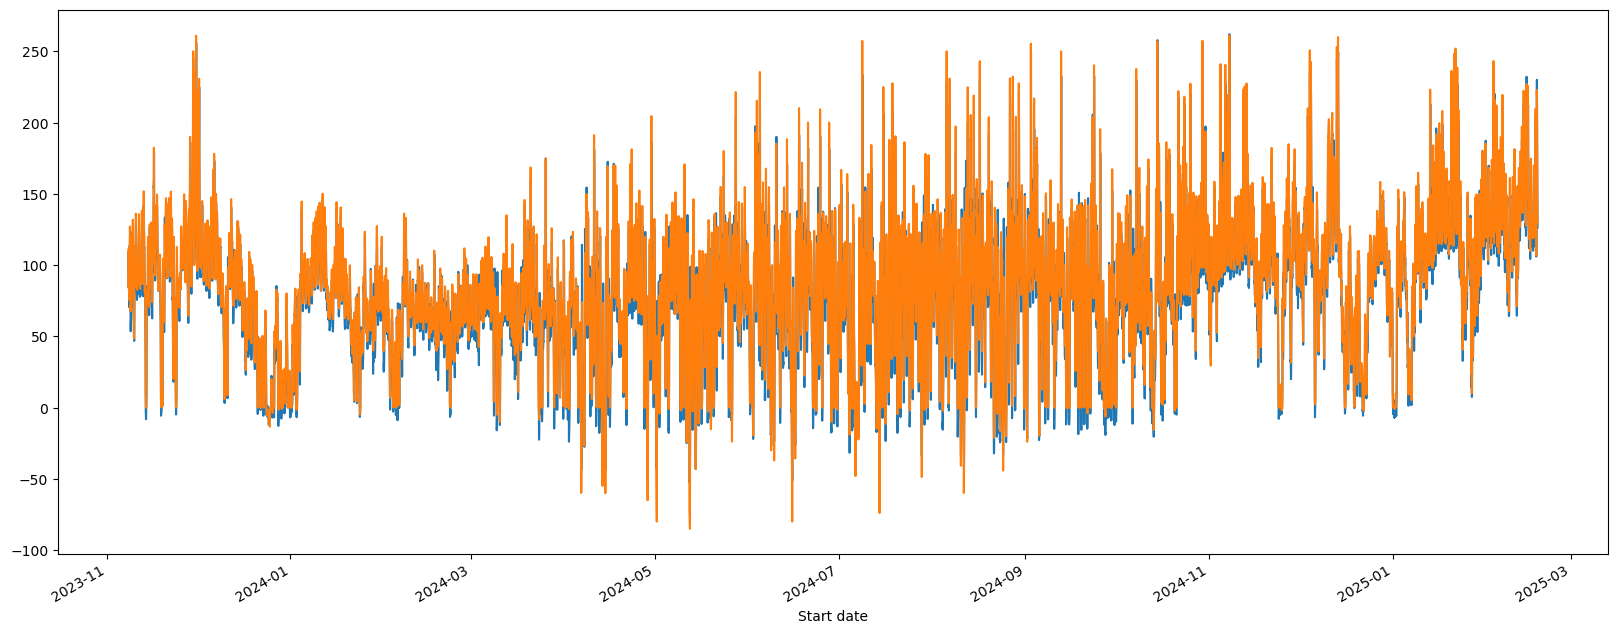

In [56]:
df_test = df.iloc[train_size+24:].copy()
df_test['Y_test_inverse'] = Y_test_inverse
df_test['Y_pred_inverse'] = Y_pred_inverse
df_test['Y_pred_inverse'].plot(figsize=(20,8))
df_test['Y_test_inverse'].plot(figsize=(20,8))

In [73]:
df_test['Y_pred_inverse'].tail(24).tolist()

[122.60853576660156,
 121.64114379882812,
 116.0802230834961,
 116.22735595703125,
 123.31507873535156,
 129.971435546875,
 134.1997833251953,
 165.18150329589844,
 202.9149627685547,
 195.54507446289062,
 147.30064392089844,
 128.2265625,
 108.50239562988281,
 106.0018081665039,
 109.43476104736328,
 119.28382110595703,
 149.08106994628906,
 178.19723510742188,
 230.00588989257812,
 207.41259765625,
 197.80023193359375,
 158.072998046875,
 141.58087158203125,
 126.16502380371094]

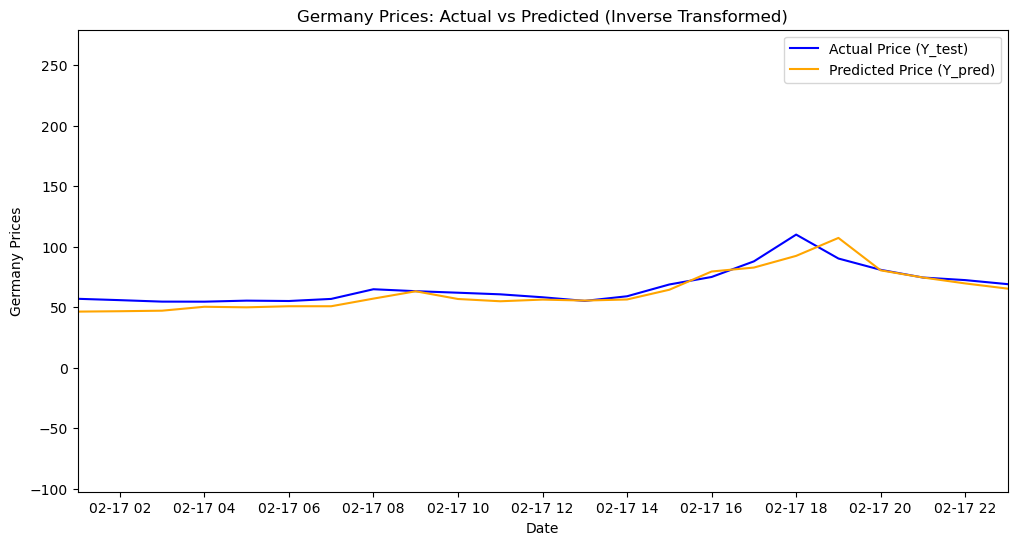

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Y_test_inverse'], label='Actual Price (Y_test)', color='blue')
plt.plot(df_test.index, df_test['Y_pred_inverse'], label='Predicted Price (Y_pred)', color='orange')
plt.xlim([pd.to_datetime('2024-02-17 01:00:00'),pd.to_datetime('2024-02-17 23:00:00')])
plt.xlabel('Date')
plt.ylabel('Germany Prices')
plt.title('Germany Prices: Actual vs Predicted (Inverse Transformed)')
plt.legend()
plt.show()

In [105]:
df_24_old = df.iloc[-24:,:]
df_24_old

,Other Generation,Wind offshore,Wind onshore,Photovoltaics,Germany Prices,Total Grid,Residual Load,War Indicator
Start date,,,,,,,,
2025-01-29 00:00:00,22693.75,4989.50,24158.50,0.00,87.72,50415.00,21267.00,1.0
2025-01-29 01:00:00,21908.50,4473.25,24266.75,0.00,83.39,48874.25,20134.25,1.0
2025-01-29 02:00:00,21533.50,3849.75,24519.50,0.00,78.16,48144.25,19775.00,1.0
2025-01-29 03:00:00,21205.25,3518.25,25182.75,0.00,75.64,48434.00,19733.00,1.0
2025-01-29 04:00:00,21731.75,2940.00,26237.50,0.00,79.01,49673.50,20496.00,1.0
2025-01-29 05:00:00,23298.75,2241.25,27182.00,0.00,86.98,52859.75,23436.50,1.0
2025-01-29 06:00:00,25882.50,1522.00,28860.25,0.00,93.14,59412.75,29030.50,1.0
2025-01-29 07:00:00,30351.50,1084.50,29300.00,11.25,141.42,64927.50,34531.75,1.0
2025-01-29 08:00:00,33672.25,1176.25,29536.50,847.50,142.54,67783.25,36223.00,1.0


In [106]:
df_24_future = pd.read_excel("forecasted/forecasted_day_data.xlsx")
df_24_future['Start date'] = pd.to_datetime(df_24_future['Start date'])
war_start_date = pd.Timestamp("2022-02-24")
df_24_future["War Indicator"] = (df_24_future["Start date"] >= war_start_date).astype(int)
df_24_future.set_index('Start date',inplace=True)
df_24_future.index = pd.to_datetime(df_24_future.index, errors='coerce')

C:\Users\asus\AppData\Local\Temp\ipykernel_11744\3749440001.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_24_future['Start date'] = pd.to_datetime(df_24_future['Start date'])


In [107]:
df_24_future['Germany Prices']=0
df_24_future

,Total Grid,Residual Load,Wind offshore,Wind onshore,Photovoltaics,Other Generation,War Indicator,Germany Prices
Start date,,,,,,,,
2025-01-30 00:00:00,50947.25,27538.00,5323.25,18086.00,0.00,25472.75,1,0
2025-01-30 01:00:00,49151.50,26861.50,5080.75,17209.25,0.00,25086.00,1,0
2025-01-30 02:00:00,48425.50,27374.25,4809.25,16242.00,0.00,24888.75,1,0
2025-01-30 03:00:00,48622.00,28862.25,4435.25,15324.50,0.00,25085.25,1,0
2025-01-30 04:00:00,50107.00,31888.50,4056.75,14161.75,0.00,26030.50,1,0
2025-01-30 05:00:00,53398.00,36950.00,3755.00,12693.00,0.00,29589.00,1,0
2025-01-30 06:00:00,60117.75,45163.75,3581.00,11373.00,0.00,33538.00,1,0
2025-01-30 07:00:00,65303.25,51839.50,3504.75,9931.00,28.00,38492.25,1,0
2025-01-30 08:00:00,67515.50,53842.00,3325.50,8802.00,1546.00,40035.50,1,0


In [108]:
features_old = df_24_old.drop(columns=['Germany Prices'])
target_old = df_24_old[['Germany Prices']]
features_old

,Other Generation,Wind offshore,Wind onshore,Photovoltaics,Total Grid,Residual Load,War Indicator
Start date,,,,,,,
2025-01-29 00:00:00,22693.75,4989.50,24158.50,0.00,50415.00,21267.00,1.0
2025-01-29 01:00:00,21908.50,4473.25,24266.75,0.00,48874.25,20134.25,1.0
2025-01-29 02:00:00,21533.50,3849.75,24519.50,0.00,48144.25,19775.00,1.0
2025-01-29 03:00:00,21205.25,3518.25,25182.75,0.00,48434.00,19733.00,1.0
2025-01-29 04:00:00,21731.75,2940.00,26237.50,0.00,49673.50,20496.00,1.0
2025-01-29 05:00:00,23298.75,2241.25,27182.00,0.00,52859.75,23436.50,1.0
2025-01-29 06:00:00,25882.50,1522.00,28860.25,0.00,59412.75,29030.50,1.0
2025-01-29 07:00:00,30351.50,1084.50,29300.00,11.25,64927.50,34531.75,1.0
2025-01-29 08:00:00,33672.25,1176.25,29536.50,847.50,67783.25,36223.00,1.0


In [109]:
features_scaled=scaler_features.fit_transform(features_old)
target_scaled=scaler_target.fit_transform(target_old)

In [110]:
df_24_old_normalised=np.hstack((features_scaled,target_scaled)) 

In [111]:
features_future = df_24_future.drop(columns=['Germany Prices'])
target_future = df_24_future[['Germany Prices']]

In [112]:
feature_scaled_f=scaler_features.fit_transform(features_future)

In [113]:
df_24_future_normalised=np.hstack((feature_scaled_f,target_scaled))

In [114]:
df_24_future_normalised,df_24_old_normalised

(array([[1.18464321e-01, 2.14695451e-02, 1.00000000e+00, 1.00000000e+00,
         0.00000000e+00, 3.40713515e-02, 0.00000000e+00, 1.62256548e-01],
        [3.41053225e-02, 0.00000000e+00, 9.04565132e-01, 9.33886323e-01,
         0.00000000e+00, 1.15078323e-02, 0.00000000e+00, 1.04096709e-01],
        [0.00000000e+00, 1.62727410e-02, 7.97717434e-01, 8.60948251e-01,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.38482203e-02],
        [9.23098605e-03, 6.34962194e-02, 6.50531287e-01, 7.91761712e-01,
         0.00000000e+00, 1.14640763e-02, 0.00000000e+00, 0.00000000e+00],
        [7.89918730e-02, 1.59537921e-01, 5.01574183e-01, 7.04081440e-01,
         0.00000000e+00, 6.66112424e-02, 0.00000000e+00, 4.52652787e-02],
        [2.33593273e-01, 3.20170741e-01, 3.82821724e-01, 5.93326421e-01,
         0.00000000e+00, 2.74218955e-01, 0.00000000e+00, 1.52316991e-01],
        [5.49267158e-01, 5.80844024e-01, 3.14344746e-01, 4.93788293e-01,
         0.00000000e+00, 5.04608967e-01, 0.00

In [115]:
future_scaled_df=pd.DataFrame(df_24_future_normalised)
future_scaled_df.iloc[:,-1]=np.nan

In [116]:
full_df=pd.concat([pd.DataFrame(df_24_old_normalised),future_scaled_df]).reset_index().drop(["index"],axis=1)

In [117]:
full_df_scaled_array=full_df.values
full_df_scaled_array.shape[1]

8

In [119]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=24
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
    full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=cnn_lstm_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,-1]=prediction

1/1 [==============================] - 0s 24ms/step


In [120]:
new_array=np.array(all_data).reshape(-1,1)
# new_array=new_array.reshape(-1,1)
# prediction_copies_array = np.repeat(new_array,4, axis=-1)
y_pred_future_24 = scaler_target.inverse_transform(new_array).flatten()

In [121]:
df_24_future['Germany Prices'] = y_pred_future_24
df_24_future

,Total Grid,Residual Load,Wind offshore,Wind onshore,Photovoltaics,Other Generation,War Indicator,Germany Prices
Start date,,,,,,,,
2025-01-30 00:00:00,50947.25,27538.00,5323.25,18086.00,0.00,25472.75,1,101.829994
2025-01-30 01:00:00,49151.50,26861.50,5080.75,17209.25,0.00,25086.00,1,96.358421
2025-01-30 02:00:00,48425.50,27374.25,4809.25,16242.00,0.00,24888.75,1,96.452484
2025-01-30 03:00:00,48622.00,28862.25,4435.25,15324.50,0.00,25085.25,1,93.245995
2025-01-30 04:00:00,50107.00,31888.50,4056.75,14161.75,0.00,26030.50,1,94.135635
2025-01-30 05:00:00,53398.00,36950.00,3755.00,12693.00,0.00,29589.00,1,99.296959
2025-01-30 06:00:00,60117.75,45163.75,3581.00,11373.00,0.00,33538.00,1,109.435654
2025-01-30 07:00:00,65303.25,51839.50,3504.75,9931.00,28.00,38492.25,1,118.093102
2025-01-30 08:00:00,67515.50,53842.00,3325.50,8802.00,1546.00,40035.50,1,120.706192
